In [4]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
y = np.array([1, 3, 2, 5, 7, 8, 8, 9, 10, 12])

n = np.size(x)

mx = np.mean(x)
my = np.mean(y)
SS_xy = np.sum(y*x) - n*my*mx
SS_xx = np.sum(x*x) - n*mx*mx
b1 = SS_xy / SS_xx
b0 = my - b1*mx

y_pred = b0 + b1*x

# calculating sum squared error
sse = 0
for i in range(n):
  sse += (y[i] - y_pred[i]) ** 2

# calculating R squared value
sst = 0
for i in range(n):
  sst += (y[i] - my) ** 2

theta0: 0.45816186762285666
theta1 1.2938004885945196
SSE: 7.37772011056771
R-Squared: 0.93774075856061


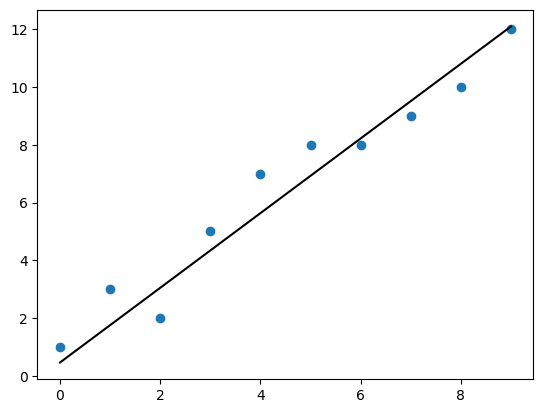

In [6]:
#Linear Regression with Gradient Descent (Full Batch)

import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.datasets import make_regression 
import pylab
from scipy import stats

def gradient_descent(alpha, x, y, ep=0.0001, max_iter=10000):
    converged = False
    iter = 0
    m = x.shape[0] # number of samples

    # initial theta
    t0 = 0
    t1 = 0

    # total error, J(theta)
    J = sum([(t0 + t1*x[i] - y[i])**2 for i in range(m)])

    # Iterate Loop
    while not converged:
        # for each training sample, compute the gradient (d/d_theta j(theta))
        grad0 = 1.0/m * sum([(t0 + t1*x[i] - y[i]) for i in range(m)]) 
        grad1 = 1.0/m * sum([(t0 + t1*x[i] - y[i])*x[i] for i in range(m)])

        # update the theta_temp
        temp0 = t0 - alpha * grad0
        temp1 = t1 - alpha * grad1
    
        # update theta
        t0 = temp0
        t1 = temp1

        # mean squared error
        e = sum( [ (t0 + t1*x[i] - y[i])**2 for i in range(m)] ) 

        if abs(J-e) <= ep:
            converged = True
    
        J = e   # update error 
        iter += 1  # update iter
    
        if iter == max_iter:
            converged = True

    return t0,t1

if __name__ == '__main__':
 
    alpha = 0.01 # learning rate
    ep = 0.01 # convergence criteria

    # call gredient decent, and get intercept(=theta0) and slope(=theta1)
    theta0, theta1 = gradient_descent(alpha, x, y, ep, max_iter=1000)
    print('theta0:', theta0)
    print('theta1', theta1) 

    # plot
    for i in range(x.shape[0]):
        y_predict = theta0 + theta1*x 

    # calculating sum squared error
    sse = 0
    for i in range(n):
      sse += (y[i] - y_predict[i]) ** 2

    print('SSE:', sse)

    # calculating R squared value

    sst = 0
    for i in range(n):
      sst += (y[i] - my) ** 2

    print('R-Squared:', 1 - (sse/sst))

    pylab.plot(x,y,'o')
    pylab.plot(x,y_predict,'k-')
    pylab.show()

In [7]:
#Linear Regression with Gradient Descent (Stochastic)
def ssr_gradient(x, y, b):
    res = b[0] + b[1] * x - y
    return res.mean(), (res * x).mean() 
def sgd(
    gradient, x, y, start, learn_rate=0.1, batch_size=1, n_iter=50,
    tolerance=1e-06, dtype="float64", random_state=None
):
    # Checking if the gradient is callable
    if not callable(gradient):
        raise TypeError("'gradient' must be callable")

    # Setting up the data type for NumPy arrays
    dtype_ = np.dtype(dtype)

    # Converting x and y to NumPy arrays
    x, y = np.array(x, dtype=dtype_), np.array(y, dtype=dtype_)
    n_obs = x.shape[0]
    if n_obs != y.shape[0]:
        raise ValueError("'x' and 'y' lengths do not match")
    xy = np.c_[x.reshape(n_obs, -1), y.reshape(n_obs, 1)]

    # Initializing the random number generator
    seed = None if random_state is None else int(random_state)
    rng = np.random.default_rng(seed=seed)

    # Initializing the values of the variables
    vector = np.array(start, dtype=dtype_)

    # Setting up and checking the learning rate
    learn_rate = np.array(learn_rate, dtype=dtype_)
    if np.any(learn_rate <= 0):
        raise ValueError("'learn_rate' must be greater than zero")

    # Setting up and checking the size of minibatches
    batch_size = int(batch_size)
    if not 0 < batch_size <= n_obs:
        raise ValueError(
            "'batch_size' must be greater than zero and less than "
            "or equal to the number of observations"
        )

    # Setting up and checking the maximal number of iterations
    n_iter = int(n_iter)
    if n_iter <= 0:
        raise ValueError("'n_iter' must be greater than zero")

    # Setting up and checking the tolerance
    tolerance = np.array(tolerance, dtype=dtype_)
    if np.any(tolerance <= 0):
        raise ValueError("'tolerance' must be greater than zero")

    # Performing the gradient descent loop
    for _ in range(n_iter):
        # Shuffle x and y
        rng.shuffle(xy)

        # Performing minibatch moves
        for start in range(0, n_obs, batch_size):
            stop = start + batch_size
            x_batch, y_batch = xy[start:stop, :-1], xy[start:stop, -1:]

            # Recalculating the difference
            grad = np.array(gradient(x_batch, y_batch, vector), dtype_)
            diff = -learn_rate * grad

            # Checking if the absolute difference is small enough
            if np.all(np.abs(diff) <= tolerance):
                break

            # Updating the values of the variables
            vector += diff

    return vector if vector.shape else vector.item()
sgd(
     ssr_gradient, x, y, start=[0.5, 0.5], learn_rate=0.0008,
     batch_size=3, n_iter=100_000, random_state=0
)

array([1.23693911, 1.16923558])